<a href="https://colab.research.google.com/github/gopalm-ai/Quantum_Machine_Learning_An_Applied_Approach/blob/main/kernel_qiskit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip3 install qiskit

     |████████████████████████████████| 6.4 MB 6.9 MB/s 
     |████████████████████████████████| 18.0 MB 564 kB/s 
     |████████████████████████████████| 238 kB 79.6 MB/s 
     |████████████████████████████████| 200 kB 81.0 MB/s 
     |████████████████████████████████| 53 kB 2.5 MB/s 
     |████████████████████████████████| 1.6 MB 48.3 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
     |████████████████████████████████| 49 kB 7.5 MB/s 
     |████████████████████████████████| 943 kB 23.7 MB/s 
     |████████████████████████████████| 49 kB 8.6 MB/s 
     |████████████████████████████████| 38.2 MB 1.3 MB/s 
     |████████████████████████████████| 3.6 MB 54.6 MB/s 
     |████████████████████████████████| 112 kB 66.6 MB/s 
  Created wheel for qiskit: filename=qiskit-0.34.1-py3-none-any.whl size=11771 sha256=3448a00a4bd222ecf3e9ae534fb44beb3af79cde1ed53442d99574cc291c692a
  Stored in directory: /root/.cache/pip/wheels/79/b1/3f/8cdfd5543a84705e4bd16e081f2362b9b3bfd9898d2e2d

In [2]:
# Import Libraries
import matplotlib.pyplot as plt
import numpy as np
from math import pi
from qiskit import *
from qiskit.tools.visualization import *
from qiskit.quantum_info import *

In [3]:
q = QuantumRegister(4)
c = ClassicalRegister(4)
backend = BasicAer.get_backend('qasm_simulator')

In [4]:
# Training and Test Set Definition
training_set = [[0, 1], [0.78861006, 0.61489363]]
labels = [0, 1]
test_set = [[-0.549, 0.836], [0.053, 0.999]]

In [5]:
# Angle Definition
test_angles = [4.30417579487669/2, 3.0357101997648965/2]
training_angle = 1.3245021469658966/4

In [16]:
# State Preparation Function
def prepare_state(q, c, angles):
  ancilla_qubit = q[0]
  index_qubit = q[1]
  data_qubit = q[2]
  class_qubit = q[3]
  circuit = QuantumCircuit(q, c)

  # Ancilla and index qubits into uniform superposition
  circuit.h(ancilla_qubit)
  circuit.h(index_qubit)

  # Prepare the test vector
  circuit.cx(ancilla_qubit, data_qubit)
  circuit.u3(-angles[0], 0, 0, data_qubit)
  circuit.cx(ancilla_qubit, data_qubit)
  circuit.u3(angles[0], 0, 0, data_qubit)
  # Flip the ancilla qubit -> this moves the input vector 
  # to the |0> state of the ancilla
  circuit.x(ancilla_qubit)
  circuit.barrier()

  # Prepare the first training vector
  # [0,1] -> class 0
  # We can prepare this with a Toffoli
  circuit.ccx(ancilla_qubit, index_qubit, data_qubit)
  # Flip index qubit -> moves the first training vector
  # to the |0> state of the index qubit
  circuit.x(index_qubit)
  circuit.barrier()

  # Prepare the second training vector
  # [0.78861, 0.61489] -> class 1
  circuit.ccx(ancilla_qubit, index_qubit, data_qubit)
  circuit.cx(index_qubit, data_qubit)
  circuit.u(angles[1], 0, 0, data_qubit)
  circuit.cx(index_qubit, data_qubit)
  circuit.u(-angles[1], 0, 0, data_qubit) 
  circuit.ccx(ancilla_qubit, index_qubit, data_qubit)
  circuit.cx(index_qubit, data_qubit)
  circuit.u(-angles[1], 0, 0, data_qubit)
  circuit.cx(index_qubit, data_qubit)
  circuit.u(angles[1], 0, 0, data_qubit) 
  circuit.barrier()

  # Flip the class label for training vector #2
  circuit.cx(index_qubit, class_qubit)
  circuit.barrier()
  return circuit

In [7]:
# Circuit Generation
from qiskit.tools.visualization import *
angles = [test_angles[0], training_angle]
state_preparation_0 = prepare_state(q, c, angles)
circuit_drawer(state_preparation_0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: The QuantumCircuit.u3 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use QuantumCircuit.u instead, which acts identically. Alternatively, you can decompose u3 in terms of QuantumCircuit.p and QuantumCircuit.sx: u3(ϴ,φ,λ) = p(φ+π) sx p(ϴ+π) sx p(λ) (2 pulses on hardware).
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: The QuantumCircuit.u3 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use QuantumCircuit.u instead, which acts identically. Alternatively, you can decompose u3 in terms of QuantumCircuit.p and QuantumCircuit.sx: u3(ϴ,φ,λ) = p(φ+π) sx p(ϴ+π) sx p(λ) (2 pulses on hardware).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: DeprecationWarning: The QuantumCircuit.u3 meth

┌───┐                                   ┌───┐        ░            ░      »
q0_0: ┤ H ├──■───────────────────────■────────┤ X ├────────░───■────────░───■──»
      ├───┤  │                       │        └───┘        ░   │  ┌───┐ ░   │  »
q0_1: ┤ H ├──┼───────────────────────┼─────────────────────░───■──┤ X ├─░───■──»
      └───┘┌─┴─┐┌─────────────────┐┌─┴─┐┌────────────────┐ ░ ┌─┴─┐└───┘ ░ ┌─┴─┐»
q0_2: ─────┤ X ├┤ U3(-2.1521,0,0) ├┤ X ├┤ U3(2.1521,0,0) ├─░─┤ X ├──────░─┤ X ├»
           └───┘└─────────────────┘└───┘└────────────────┘ ░ └───┘      ░ └───┘»
q0_3: ─────────────────────────────────────────────────────░────────────░──────»
                                                           ░            ░      »
c0: 4/═════════════════════════════════════════════════════════════════════════»
                                                                               »
«                                                                 »
«q0_0: ───────────────────────────────────────────────────■───────»
«                                                         │       »
«q0_1: ──■───────────────────────■────────────────────────■────■──»
«      ┌─┴─┐┌─────────────────┐┌─┴─┐┌──────────────────┐┌─┴─┐┌─┴─┐»
«q0_2: ┤ X ├┤ U3(0.33113,0,0) ├┤ X ├┤ U3(-0.33113,0,0) ├┤ X ├┤ X ├»
«      └───┘└─────────────────┘└───┘└──────────────────┘└───┘└───┘»
«q0_3: ───────────────────────────────────────────────────────────»
«                                                                 »
«c0: 4/═══════════════════════════════════════════════════════════»
«                                                                 »
«                                                   ░       ░ 
«q0_0: ─────────────────────────────────────────────░───────░─
«                                                   ░       ░ 
«q0_1: ──────────────────────■──────────────────────░───■───░─
«      ┌──────────────────┐┌─┴─┐┌─────────────────┐ ░   │   ░ 
«q0_2: ┤ U3(-0.33113,0,0) ├┤ X ├┤ U3(0.33113,0,0) ├─░───┼───░─
«      └──────────────────┘└───┘└─────────────────┘ ░ ┌─┴─┐ ░ 
«q0_3: ─────────────────────────────────────────────░─┤ X ├─░─
«                                                   ░ └───┘ ░ 
«c0: 4/═══════════════════════════════════════════════════════
«

In [17]:
# Shallow Depth Kernel
def interfere_data_and_test_instances(circuit, q, c, angles):
  circuit.h(q[0])
  circuit.barrier()
  circuit.measure(q, c)
  return circuit

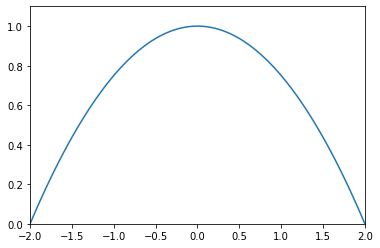

In [18]:
# Kernel Generation
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
x = np.linspace(-2, 2, 100)
plt.xlim(-2, 2)
plt.ylim(0, 1.1)
plt.plot(x, 1-x**2/4)

In [19]:
# Lambda Function
def postselect(result_counts):
  total_samples = sum(result_counts.values())
  # lambda function: returns values only when ancilla is in the |0> state
  post_select = lambda counts: [(state, occurrences) for state, occurrences 
                                in counts.items() if state[-1] == '0']
  # perform the postselection
  postselection = dict(post_select(result_counts))
  postselected_samples = sum(postselection.values())

  print(f'Ancilla post-selection probability was found to be {postselected_samples/total_samples}')
  retrieve_class = lambda binary_class: [occurrences for state, occurrences 
                                         in postselection.items() if state[0] 
                                         == str(binary_class)]
  prob_class0 = sum(retrieve_class(0))/postselected_samples
  prob_class1 = sum(retrieve_class(1))/postselected_samples

  print('Probability for class 0 is', prob_class0)
  print('Probability for class 1 is', prob_class1)


In [20]:
# First Instance
circuit_0 = interfere_data_and_test_instances(state_preparation_0, q, c, angles)
job = execute(circuit_0, backend)
result = job.result()
postselect(result.get_counts(circuit_0))

Ancilla post-selection probability was found to be 0.482421875
Probability for class 0 is 0.5141700404858299
Probability for class 1 is 0.48582995951417


In [21]:
# Second Instance
angles = [test_angles[1], training_angle]
state_preparation_1 = prepare_state(q, c, angles)
circuit_1 = interfere_data_and_test_instances(state_preparation_1, q, c, angles)
job = execute(circuit_1, backend)
result = job.result()
postselect(result.get_counts(circuit_1))

Ancilla post-selection probability was found to be 0.8974609375
Probability for class 0 is 0.5408052230685527
Probability for class 1 is 0.4591947769314472


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: The QuantumCircuit.u3 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use QuantumCircuit.u instead, which acts identically. Alternatively, you can decompose u3 in terms of QuantumCircuit.p and QuantumCircuit.sx: u3(ϴ,φ,λ) = p(φ+π) sx p(ϴ+π) sx p(λ) (2 pulses on hardware).
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: The QuantumCircuit.u3 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use QuantumCircuit.u instead, which acts identically. Alternatively, you can decompose u3 in terms of QuantumCircuit.p and QuantumCircuit.sx: u3(ϴ,φ,λ) = p(φ+π) sx p(ϴ+π) sx p(λ) (2 pulses on hardware).
